In [2]:
import torch 
from torch import nn
from torch.nn import functional as F
from torch import optim

In [3]:
import torchvision
from matplotlib import pyplot as plt

In [7]:
# step 1. load dataset

trans = torchvision.transforms.ToTensor()
batch_size = 256

train_loader = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(root='data', 
                                                                             train=True, 
                                                                             transform=trans, 
                                                                             download=True), 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.FashionMNIST(root='data', 
                                                                            train=False, 
                                                                            transform=trans, 
                                                                            download=True), 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [8]:
# plot image
def plot_image(img, label, name):

    fig = plt.figure()
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name, label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

torch.Size([256, 1, 28, 28]) torch.Size([256]) tensor(0.) tensor(1.)


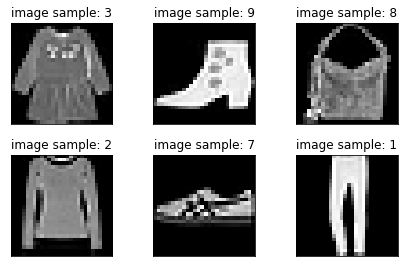

In [10]:
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'image sample')

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        
        return x

In [12]:
net = Net()

net

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [13]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [14]:
train_loss = []

In [15]:
def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

In [ ]:
# scatter_(input, dim, index, src)：将src中数据根据index中的索引按照dim的方向填进input。
# 可以理解成放置元素或者修改元素     

In [17]:
for epoch in range(3):
    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.view(x.size(0), 28*28)
        out = net(x)
        y_onehot = one_hot(y)
        
        loss = F.mse_loss(out, y_onehot)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        train_loss.append(loss.item())
        
        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())
            


C:\Users\26250\AppData\Local\Temp/ipykernel_23032/1752387508.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


0 0 0.08988836407661438
0 10 0.09002567827701569
0 20 0.08986802399158478
0 30 0.0898667573928833
0 40 0.08980410546064377
0 50 0.08987268805503845
0 60 0.08966003358364105
0 70 0.0897974893450737
0 80 0.08957622200250626
0 90 0.08960474282503128
0 100 0.08939582109451294
0 110 0.0893915444612503
0 120 0.08955593407154083
0 130 0.089217409491539
0 140 0.0893937349319458
0 150 0.08931158483028412
0 160 0.08924213796854019
0 170 0.08923034369945526
0 180 0.0891108512878418
0 190 0.08903823792934418
0 200 0.08916310220956802
0 210 0.08914197236299515
0 220 0.08902491629123688
0 230 0.0889497846364975
1 0 0.08899464458227158
1 10 0.08896957337856293
1 20 0.08890406042337418
1 30 0.0887964591383934
1 40 0.08865301311016083
1 50 0.08886242657899857
1 60 0.08863136917352676
1 70 0.08883901685476303
1 80 0.08843016624450684
1 90 0.08860398828983307
1 100 0.0884704738855362
1 110 0.08849355578422546
1 120 0.08857565373182297
1 130 0.08813988417387009
1 140 0.0882028266787529
1 150 0.08834226429

In [18]:
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()

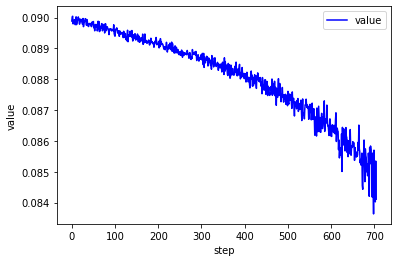

In [20]:
plot_curve(train_loss)

In [21]:
total_correct = 0

for x,y in test_loader:
    x  = x.view(x.size(0), 28*28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

C:\Users\26250\AppData\Local\Temp/ipykernel_23032/1752387508.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


In [22]:
total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

test acc: 0.3368


C:\Users\26250\AppData\Local\Temp/ipykernel_23032/1752387508.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


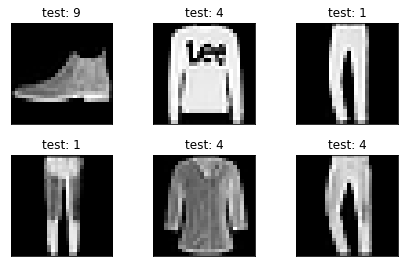

In [23]:
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')